<a href="https://colab.research.google.com/github/kaindoh/Autolib-Project/blob/master/Autolib%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`AUTOLIB PROJECT`**




# Problem Statement

To work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the  Autolib dataset on either weekday or weekend.

# Creating the hypothesis

> $H_0 : The Blue Car Are Most Active On Friday More Than Monday$

> $H_1 : The Blue Car Are Not Most Active On Friday More Than Monday$

# Importing libaries and Loading the datasets

In [0]:
#importing relevant files
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import GaussianNB


In [351]:
#loading the actual datasets from url
#
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [352]:
#loding the dataset that has the explanation of the dataset
#
descr = pd.read_excel("columns_explanation (1).xlsx")
descr

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


# Understanding the Dataset

In [353]:
#Getting the detailed information of the data
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [354]:
#Getting the statistical overview of the columns
#
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [355]:
#Getting the name of the columns
#
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

# Data Cleaning

In [356]:
#Checking for missing values
#
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no missing values

In [357]:
#Checking for duplicates
#
df.duplicated().any()

False

There are no duplicates

In [358]:
#Making the column names uniform
#
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

Removing white space and converting to lower case

In [359]:
#confirming that the columns have actually been dropped
#
df.head(1)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [360]:
#Based on the problem statement we only require data that is for weekday only
#Therefore i filter the dataset to weekday only
df = df[df['day_type'] == 'weekday']


#Taking a sample of 10 using simple random sampling to actually confirm tht the data is for weekday only
df.sample(10)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
13523,94120,4/3/2018,1440,1,weekday,46,42,0,0,3,2,0,0
3934,91330,2/5/2018,1440,0,weekday,5,8,0,0,0,1,0,1
13247,94100,5/8/2018,1425,1,weekday,6,4,0,0,0,0,0,0
10883,93230,1/16/2018,1440,1,weekday,26,28,0,0,7,5,0,0
7583,92310,4/12/2018,1440,3,weekday,43,36,1,1,3,2,0,0
6042,92200,5/1/2018,1440,1,weekday,35,36,0,0,12,12,0,0
4893,92120,3/5/2018,1440,0,weekday,76,68,2,3,6,3,0,0
9258,92420,3/16/2018,1440,4,weekday,9,10,0,0,0,0,0,0
13225,94100,4/16/2018,1440,0,weekday,5,6,0,1,0,1,0,0
9088,92410,3/1/2018,1389,3,weekday,8,6,0,0,0,0,0,0


In [0]:
#dropping the daytype because its no longer useful
#
df.drop('day_type',axis=1,inplace=True)

In [362]:
df.head()

,postal_code,date,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,114,117,3,3,6,6,18,20


In [363]:
#converting the day of the week to Monday Tuesday Wednesday Thursday and Friday for easier visualiztion
#
df['dayofweek'] = df.dayofweek.map({0:"Monday", 1:"Tuesday",2:"Wednesday",3:"Thursday", 4:"Friday"})
df['dayofweek'].head()

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
Name: dayofweek, dtype: object

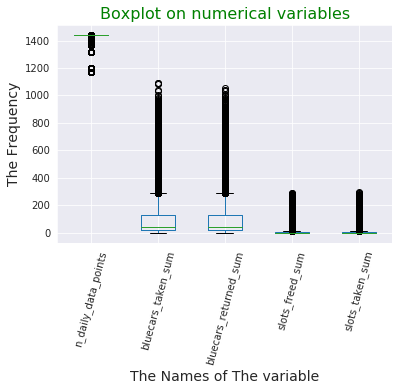

In [364]:
#checking for outliers
#
df[['date','n_daily_data_points','bluecars_taken_sum','bluecars_returned_sum','slots_freed_sum','slots_taken_sum']].plot(kind='box')
plt.title("Boxplot on numerical variables",fontsize =16,color = 'green')
plt.xlabel("The Names of The variable",fontsize =14)
plt.ylabel("The Frequency",fontsize =14)
plt.xticks(rotation =75)
plt.show()

There is enough evidence of possible sources of outliers however the outliers are so many hence there should be attached reasons as to why they are like so hence i will not drop them

In [365]:
#This is how data appears after cleaning
#
df.head(3)

,postal_code,date,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,Monday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,Tuesday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,Wednesday,138,139,0,0,2,2,27,27


# Data visualization 

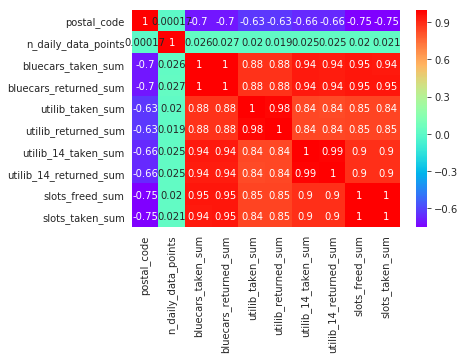

In [366]:
#checking for correlation between different variables using heatmap
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

There is high correlation between


1.   Blue cars taken and blue cars returned
2.   slots taken and slots freed



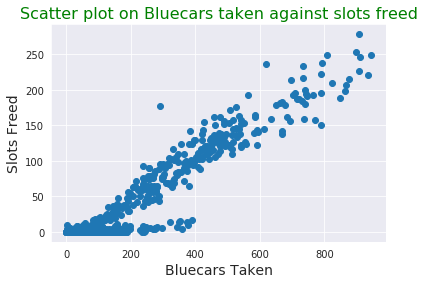

In [367]:
#checking the relationship between blue cars taken and slots freed
plt.scatter(df1.bluecars_taken_sum,df1.slots_freed_sum)
plt.title("Scatter plot on Bluecars taken against slots freed",fontsize =16,color = 'green')
plt.xlabel("Bluecars Taken",fontsize =14)
plt.ylabel("Slots Freed",fontsize =14)
plt.show()

There is a positive relationship between bluecars taken and slots freed

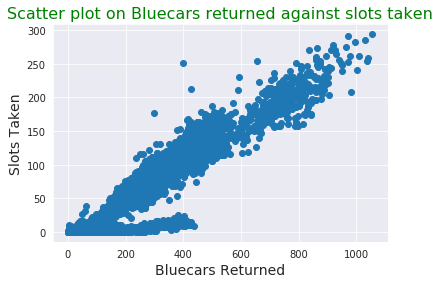

In [368]:
#checking the relationship between blue cars returned and slots taken
plt.scatter(df.bluecars_returned_sum,df.slots_taken_sum)
plt.title("Scatter plot on Bluecars returned against slots taken",fontsize =16,color = 'green')
plt.xlabel("Bluecars Returned",fontsize =14)
plt.ylabel("Slots Taken",fontsize =14)
plt.show()

There is a strong positive relationship between bluecars returned and slots taken

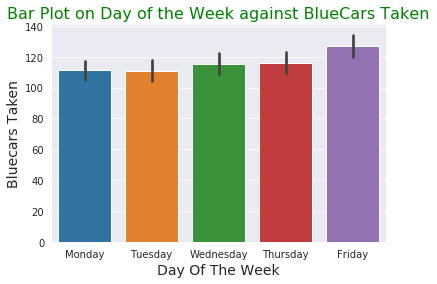

In [369]:
#checking which day has the highest number of blue cars taken
#

sns.set_style(style = 'darkgrid')
sns.barplot(df.dayofweek,df.bluecars_taken_sum)
plt.title("Bar Plot on Day of the Week against BlueCars Taken",fontsize =16,color = 'green')
plt.xlabel("Day Of The Week",fontsize =14)
plt.ylabel("Bluecars Taken",fontsize =14)
plt.show()

Friday has the highest number of blue cars taken and Monday has the lowest number of cars taken

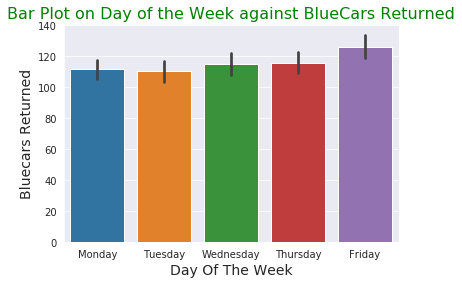

In [370]:
#checking which day has the highest number of blue cars taken
#

sns.set_style(style = 'darkgrid')
sns.barplot(df.dayofweek,df.bluecars_returned_sum)
plt.title("Bar Plot on Day of the Week against BlueCars Returned",fontsize =16,color = 'green')
plt.xlabel("Day Of The Week",fontsize =14)
plt.ylabel("Bluecars Returned",fontsize =14)
plt.show()

Friday has the highest number of blue cars returned and monday has the lowest number of cars taken

This therefore shows that bluecars is more active on fridays more than any other day of the week

In [371]:
# Getting clear difference on blue cars taken on monday and on friday
df = df[(df['dayofweek'] == 'Monday') | (df['dayofweek'] == 'Friday')]

# Getting a sample of the filtered data

df.sample(10)

,postal_code,date,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5396,92150,4/9/2018,1440,Monday,177,161,5,5,8,9,4,3
6793,92250,4/2/2018,1439,Monday,70,63,1,0,2,2,2,2
3789,78150,2/16/2018,1439,Friday,43,48,5,1,0,1,0,0
2808,75019,1/1/2018,1440,Monday,513,539,24,28,42,40,109,120
9400,92500,3/2/2018,1440,Friday,126,133,3,3,7,5,0,0
2772,75018,5/4/2018,1435,Friday,408,398,27,27,27,31,137,137
761,75005,6/1/2018,1440,Friday,299,299,10,9,22,23,96,102
5889,92190,5/4/2018,1435,Friday,72,70,1,0,8,6,0,0
13650,94130,3/5/2018,1440,Monday,31,29,0,0,2,3,0,0
1645,75011,3/30/2018,1434,Friday,492,461,9,11,46,45,134,128


In [372]:
#Getting the unique values of day of week
df.dayofweek.unique()

array(['Monday', 'Friday'], dtype=object)

In [373]:
#Grouping the blue cars returned by their day of week
df1 = df.groupby('dayofweek')['bluecars_returned_sum'].sum()
df1

dayofweek
Friday    286029
Monday    264808
Name: bluecars_returned_sum, dtype: int64

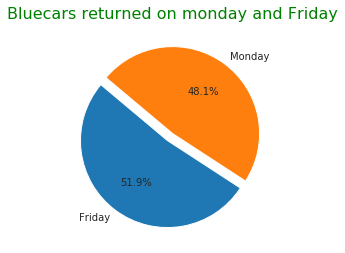

In [374]:
#plotiing bluecars returned on monday and Friday
explode =[0.1,0]
plt.title("Bluecars returned on monday and Friday",fontsize = 16,color = "green")
plt.pie(df1.values,explode=explode,labels=df1.index,startangle=140,autopct="%1.1f%%")
plt.show()

In [375]:
#Grouping the blue cars taken by their day of week
df2 = df.groupby('dayofweek')['bluecars_taken_sum'].sum()
df2

dayofweek
Friday    288546
Monday    263893
Name: bluecars_taken_sum, dtype: int64

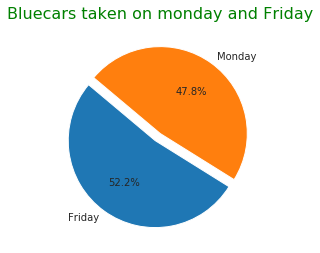

In [376]:
#plotiing bluecars taken on monday and Friday
explode =[0.1,0]
plt.title("Bluecars taken on monday and Friday",fontsize = 16,color = "green")
plt.pie(df2.values,explode=explode,labels=df2.index,startangle=140,autopct="%1.1f%%")
plt.show()

It is clear that friday is bigger than monday

In [377]:
#Getting the population mean and population standard deviation
pop_mean_taken = df.bluecars_taken_sum.mean()
pop_mean_returned = df.bluecars_returned_sum.mean()
pop_std_taken = df.bluecars_taken_sum.std()
pop_std_returned = df.bluecars_returned_sum.std()
print("Population mean of blue cars taken",pop_mean_taken)
print("Population mean of blue cars returned",pop_mean_returned)
print("population standard deviation of blue cars taken",pop_std_taken)
print("population standard deviation of blur cars returned",pop_std_returned)


Population mean of blue cars taken 118.93196986006458
Population mean of blue cars returned 118.5870828848224
population standard deviation of blue cars taken 172.80257918893628
population standard deviation of blur cars returned 172.0243996130345


# Sampling the data using Stratified sampling

I have used stratified sampling because i am dealing with categorical data which is days in a week which does not overlap with each other 

In [378]:

#stratified sampling 
df1 = df.groupby('dayofweek',group_keys=False).apply(lambda x : x.sample(frac = 0.3))
df1.head()

,postal_code,date,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3301,75116,1/26/2018,1437,Friday,18,15,0,0,0,0,1,1
4710,92110,2/2/2018,1440,Friday,22,21,1,0,2,3,0,0
12011,93390,5/25/2018,1440,Friday,1,4,1,0,0,0,0,0
7761,92320,5/4/2018,1435,Friday,44,46,2,1,2,2,0,0
10399,93130,5/4/2018,1435,Friday,39,36,1,1,4,2,0,0


In [379]:
#Getting the sample mean and sample standard deviation
samp_mean_taken = df1.bluecars_taken_sum.mean()
samp_mean_returned = df1.bluecars_returned_sum.mean()
samp_std_taken = df1.bluecars_taken_sum.std()
samp_std_returned = df1.bluecars_returned_sum.std()
print("Sample mean of blue cars taken",samp_mean_taken)
print("Sample mean of blue cars returned",samp_mean_returned)
print("Sample standard deviation of blue cars taken",samp_std_taken)
print("Sample standard deviation of blue cars returned",samp_std_returned)

Sample mean of blue cars taken 125.68987796123474
Sample mean of blue cars returned 125.01507537688443
Sample standard deviation of blue cars taken 181.3096751292088
Sample standard deviation of blue cars returned 180.2742337150131


# Getting the probabilities

Here we use poisson Distribution because we are testing the probability of an event happening 

## Taking cars

In [380]:
#The probability that 100 bluecars were taken  on monday
#i have chosen 100 because it is around the mean
monday = df1[df1.dayofweek == "Monday"]

monday_taken  = monday.bluecars_taken_sum.mean()
stats.poisson.pmf(100,monday_taken)

0.013674264536136092

In [381]:
#The probability that 117 bluecars were taken  on Friday 
Friday = df1[df1.dayofweek == "Friday"]

Friday_taken  = Friday.bluecars_taken_sum.mean()
stats.poisson.pmf(117,Friday_taken)

0.008521072214770747

From the above two experiment it evident that the probability taking 117 cars on friday and taking 100 cars on monday is the same.

Meaning that friday has more cars taken compared to monday

## Returning cars

In [382]:
#The probability that 100 bluecars were returned  on monday
#i have chosen 100 because it is around the mean
monday = df1[df1.dayofweek == "Monday"]

monday_returned  = monday.bluecars_returned_sum.mean()
stats.poisson.pmf(100,monday_returned)

0.013643616080310108

In [383]:
#The probability that 117 bluecars were returned  on Friday 
Friday = df1[df1.dayofweek == "Friday"]

Friday_returned  = Friday.bluecars_returned_sum.mean()
stats.poisson.pmf(116,Friday_returned)

0.00895502691389563

From the above two experiment it evident that the probability of 116 cars returned on friday and 100 cars returned on monday is the same.

Meaning that friday has more cars taken compared to monday

# The probability of returning cars  given they were taken

Here we will use Bayesian distribution because there is presence of a condition

In [384]:
#p(returning cars/taken) = (p(Taken/returning cars) * p(returning car) )/p(taken)

x = df1[['bluecars_returned_sum','bluecars_taken_sum']]
y = df1.dayofweek

#splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=100)

#normalizing the dataset
sc= StandardScaler()

#Fitting and training the dataset
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#predicting using bayesian classifier
gn = GaussianNB()
gn.fit(x_train,y_train)

y_pred=gn.predict(x_test)


#getting the accuracy of the prediction
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.5121951219512195
[[ 59 287]
 [ 53 298]]


The days were predicted well with 51.35% accuracy between monday and Friday

# Testing The Significance of The Hypothesis

## Testing for normality 

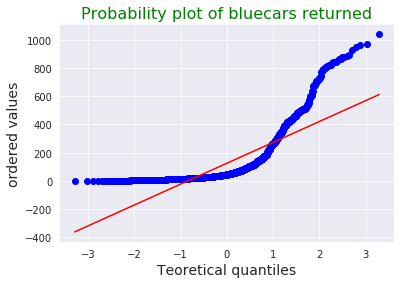

In [385]:
#Testing for normality before perfoming z_test
#using p-plot on bluecrs returned
stats.probplot(df1.bluecars_returned_sum,plot=plt)
plt.title("Probability plot of bluecars returned",fontsize =16,color = 'green')
plt.xlabel("Teoretical quantiles",fontsize =14)
plt.ylabel("ordered values",fontsize =14)
plt.show()

The blue cars returned have little sense of normality

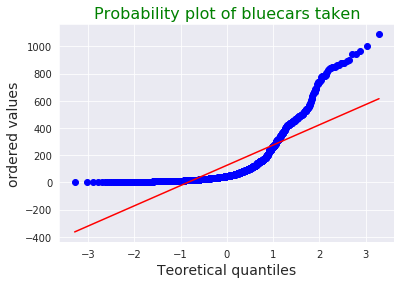

In [386]:
#p-plot on blue cars taken
stats.probplot(df1.bluecars_taken_sum,plot=plt)
plt.title("Probability plot of bluecars taken",fontsize =16,color = 'green')
plt.xlabel("Teoretical quantiles",fontsize =14)
plt.ylabel("ordered values",fontsize =14)
plt.show()

The blue cars taken have little sense of normality

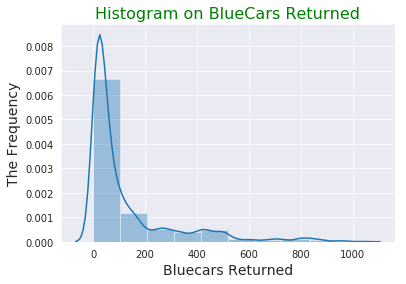

In [387]:
#plotting histogram to test for normality on bluecars returned
sns.distplot(df1.bluecars_returned_sum,bins=10,hist=True,kde=True)
plt.title("Histogram on BlueCars Returned",fontsize =16,color = 'green')
plt.xlabel("Bluecars Returned",fontsize =14)
plt.ylabel("The Frequency",fontsize =14)
plt.show()

It is normally distributed but it is skewed to the right

In [388]:
#Test for skewness on bluecars returned
df1.bluecars_returned_sum.skew()

2.303847354224035

There is evidence of skewnes upto 2.32 on bluecars returned

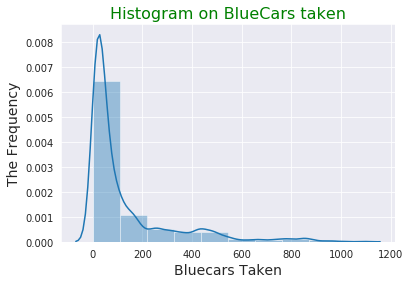

In [389]:
#plotting histogram to test for normality on bluecars taken
sns.distplot(df1.bluecars_taken_sum,bins=10,hist=True,kde=True)
plt.title("Histogram on BlueCars taken",fontsize =16,color = 'green')
plt.xlabel("Bluecars Taken",fontsize =14)
plt.ylabel("The Frequency",fontsize =14)
plt.show()

Bluecars taken are normally distributed but skewed to the right

In [390]:
#Test for skewness on bluecars taken
df1.bluecars_taken_sum.skew()

2.3105599623298443

There is evidence of skewness upto 2.32 on bluecars taken

## Application of ztest

The assumptions for using ztest are as follows which have been met


1.   Test for normality
2.   Sample size greater than 30
3.   The columns are independent
4.   The sample is randomly selected from the population




In [391]:
#z_test blue cars returned
ztest ,pval = weightstats.ztest(df1.bluecars_returned_sum, x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.4088181389085513e-10
reject null hypothesis


Therefore the hypothesis is statistically significant

In [392]:
#z_test blue cars taken
ztest ,pval = weightstats.ztest(df1.bluecars_taken_sum, x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

4.3927525014682476e-10
reject null hypothesis


Therefore full evidence that our data is statistically significant

# Challenge the Solution

## using utilib 14

In [393]:
#z_test utilib 14 cars returned
ztest ,pval = weightstats.ztest(df1.utilib_14_returned_sum, x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [394]:
#z_test utilib 14 cars taken
ztest ,pval = weightstats.ztest(df1.utilib_14_taken_sum, x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


## using utlib

In [396]:
#z_test utilib cars returned
ztest ,pval = weightstats.ztest(df1.utilib_returned_sum, x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [397]:
#z_test utilib cars taken
ztest ,pval = weightstats.ztest(df1.utilib_taken_sum, x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


It is evident that we have rejected the null hypothesis for taking and returning utilib cars and utilib 14 cars just as we did in blue cars

# Conclusion

From the above analysis we conclude that usage of bluecars is more on Friday more than Monday